In [ ]:
!7z x 'Dates Data.zip'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 41486039 bytes (40 MiB)

Extracting archive: Dates Data.zip
--
Path = Dates Data.zip
Type = zip
Physical Size = 41486039

  0%     23% 696 - Dates Data/Immature/N3.S1.B.12.JPG                                              38% 1126 - Dates Data/Immature/B4.S2.B.27.JPG                                               51% 1480 - Dates Data/Immature/S1.S2.B.33.JPG                                               73% 2137 - Dates Data/Kalal/S3.S4.B.28

In [ ]:
ls

'Dates Data'/  'Dates Data.zip'   sample_data/


In [ ]:
import numpy as np
from skimage import io
import os
import pickle

os.chdir('Dates Data/')
!ls
folders = ['Immature', 'Kalal', 'Tamar']
folder_labels = {'Immature':0, 'Kalal':1, 'Tamar':2}

image_files = []
labels = []

for folder in folders:
	os.chdir(folder)
	files = os.listdir()
	
	for file in files:
		img = io.imread(file)
		image_files.append(img)
		labels.append(folder_labels[folder])
		
	os.chdir('../')
	
with open('image_files.pkl', 'wb') as f:
	pickle.dump(image_files, f)
	
	
with open('labels.pkl', 'wb') as f:
	pickle.dump(labels, f)

print(labels)

 Immature   Kalal   Tamar  'Test Data'
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
import pickle
from sklearn.model_selection import train_test_split

# keras imports for the dataset and building our neural network
from keras import *
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D,GlobalAveragePooling2D, Flatten
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import MobileNet



from sklearn.metrics import accuracy_score

image_files = np.array(image_files)
labels = np.array(labels)
	
X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.33, random_state=42)


base_model=MobileNet(weights='imagenet',include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
preds=Dense(3,activation='softmax')(x)

model= Model(inputs=base_model.input,outputs=preds)

#for i,layer in enumerate(model.layers):
  #print(i,layer.name)


for layer in model.layers:
    layer.trainable=False

for layer in model.layers[:87]:
    layer.trainable=False
for layer in model.layers[87:]:
    layer.trainable=True


model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

17235968/17225924 [==============================] - 0s 0us/step
Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


60/60 [==============================] - 16s 66ms/step - loss: 0.9104 - accuracy: 0.6468 - val_loss: 0.6813 - val_accuracy: 0.7194
Epoch 2/25
60/60 [==============================] - 3s 47ms/step - loss: 0.5638 - accuracy: 0.7689 - val_loss: 0.5979 - val_accuracy: 0.7343
Epoch 3/25
60/60 [==============================] - 3s 47ms/step - loss: 0.4587 - accuracy: 0.8192 - val_loss: 0.4508 - val_accuracy: 0.8193
Epoch 4/25
60/60 [==============================] - 3s 47ms/step - loss: 0.4072 - accuracy: 0.8349 - val_loss: 0.4176 - val_accuracy: 0.8321
Epoch 5/25
60/60 [==============================] - 3s 47ms/step - loss: 0.3209 - accuracy: 0.8784 - val_loss: 0.4828 - val_accuracy: 0.8119
Epoch 6/25
60/60 [==============================] - 3s 47ms/step - loss: 0.2463 - accuracy: 0.9104 - val_loss: 0.5159 - val_accuracy: 0.8140
Epoch 7/25
60/60 [==============================] - 3s 47ms/step - loss: 0.2379 - accuracy: 0.8978 - val_loss: 0.4618 - val_accuracy: 0.8587
Epoch 8/25
60/60 [=====

30/30 - 1s - loss: 0.8160 - accuracy: 0.8693 - 1s/epoch - 34ms/step


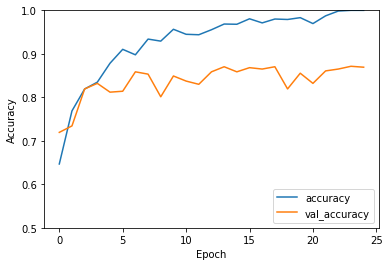

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [ ]:
model.save('dates_model.h5')